In [2]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import random

In [9]:
import shap
shap.initjs()

In [10]:
subject = 'Pernambuco - Consumo de Cimento (t)'
split_index = 12 #Referente aos 13 anos de input  

In [11]:
data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_PE.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.drop('Pernambuco - Produção de Cimento (t)', axis=1)
data

,Ano,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - IDH Longevidade,Pernambuco - IDH Educacao,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),...,Pernambuco - Desemprego,Pernambuco - IDH Renda,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco - Consumo de Cimento (t)
0,2008,8.785657e+07,5.769035e+06,8.834432,7.768216e+07,0.704795,0.787611,0.660899,5.483335e+08,2.546644e+09,...,8.049769,0.671922,23.704331,1012.356520,1564.281549,25.868467,21.249870,75.428608,2.118063,1717.153000
1,2009,8.860216e+07,5.810149e+06,8.858245,7.790384e+07,0.707057,0.790400,0.665481,5.302764e+08,2.679945e+09,...,8.078293,0.671804,22.861798,1012.209502,1487.098457,25.873200,21.577129,77.771392,1.951534,1878.938000
2,2010,9.096526e+07,5.826469e+06,8.909890,7.856512e+07,0.709020,0.792674,0.669877,5.046425e+08,2.891930e+09,...,8.042187,0.671411,22.487970,1012.234225,1437.305833,25.750070,21.891970,80.133165,1.854189,2406.931000
3,2011,9.301827e+07,5.792701e+06,8.937706,7.897343e+07,0.710693,0.794444,0.674084,4.854622e+08,3.091988e+09,...,8.028882,0.670748,21.107295,1012.512701,1436.247207,25.736127,21.841067,80.179132,1.815199,2496.113000
4,2012,9.484266e+07,5.717659e+06,8.949260,7.926901e+07,0.711600,0.795572,0.677443,4.867661e+08,3.189506e+09,...,12.192814,0.669292,21.566683,1012.689602,1436.457629,25.711228,21.251350,77.643662,1.728413,2728.230000
5,2013,9.627386e+07,5.616792e+06,8.939248,7.935398e+07,0.713567,0.796536,0.682563,5.225848e+08,3.093872e+09,...,13.117303,0.668984,21.669594,1012.907542,1521.117838,25.685608,20.953182,76.283825,1.611013,2982.021000
6,2014,9.733647e+07,5.498393e+06,8.923227,7.929548e+07,0.714447,0.796914,0.686026,5.676413e+08,2.779340e+09,...,13.857509,0.667649,19.852601,1013.159804,1654.440407,25.780576,20.818540,75.113876,1.558118,2983.632857
7,2015,9.797155e+07,5.411870e+06,8.896326,7.910750e+07,0.714401,0.796740,0.688529,5.179392e+08,2.561731e+09,...,14.543115,0.665120,18.352626,1013.187593,1731.551083,25.909409,21.066299,75.720358,1.597579,2632.837886
8,2016,9.849009e+07,5.357988e+06,8.887508,7.905537e+07,0.722910,0.809069,0.701506,4.524144e+08,2.516859e+09,...,14.833751,0.666277,16.821327,1013.081354,1774.985187,25.897163,21.315125,76.984087,1.606812,2308.455257
9,2017,9.859294e+07,5.346247e+06,8.880979,7.898921e+07,0.722811,0.808712,0.702551,4.213689e+08,2.497710e+09,...,14.580259,0.665302,16.755645,1013.025277,1768.623220,25.854367,21.296659,77.129112,1.578862,1813.941000


In [12]:
input_data = data.iloc[:-2, 1:-1]
input_data

,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - IDH Longevidade,Pernambuco - IDH Educacao,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),...,Taxa Selic (%),Pernambuco - Desemprego,Pernambuco - IDH Renda,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,8.785657e+07,5.769035e+06,8.834432,7.768216e+07,0.704795,0.787611,0.660899,5.483335e+08,2.546644e+09,1.874883e+10,...,11.760983,8.049769,0.671922,23.704331,1012.356520,1564.281549,25.868467,21.249870,75.428608,2.118063
1,8.860216e+07,5.810149e+06,8.858245,7.790384e+07,0.707057,0.790400,0.665481,5.302764e+08,2.679945e+09,2.055015e+10,...,9.472585,8.078293,0.671804,22.861798,1012.209502,1487.098457,25.873200,21.577129,77.771392,1.951534
2,9.096526e+07,5.826469e+06,8.909890,7.856512e+07,0.709020,0.792674,0.669877,5.046425e+08,2.891930e+09,2.342247e+10,...,9.332485,8.042187,0.671411,22.487970,1012.234225,1437.305833,25.750070,21.891970,80.133165,1.854189
3,9.301827e+07,5.792701e+06,8.937706,7.897343e+07,0.710693,0.794444,0.674084,4.854622e+08,3.091988e+09,2.604265e+10,...,10.985689,8.028882,0.670748,21.107295,1012.512701,1436.247207,25.736127,21.841067,80.179132,1.815199
4,9.484266e+07,5.717659e+06,8.949260,7.926901e+07,0.711600,0.795572,0.677443,4.867661e+08,3.189506e+09,2.708753e+10,...,8.159014,12.192814,0.669292,21.566683,1012.689602,1436.457629,25.711228,21.251350,77.643662,1.728413
5,9.627386e+07,5.616792e+06,8.939248,7.935398e+07,0.713567,0.796536,0.682563,5.225848e+08,3.093872e+09,2.523394e+10,...,7.913561,13.117303,0.668984,21.669594,1012.907542,1521.117838,25.685608,20.953182,76.283825,1.611013
6,9.733647e+07,5.498393e+06,8.923227,7.929548e+07,0.714447,0.796914,0.686026,5.676413e+08,2.779340e+09,1.954361e+10,...,10.350442,13.857509,0.667649,19.852601,1013.159804,1654.440407,25.780576,20.818540,75.113876,1.558118
7,9.797155e+07,5.411870e+06,8.896326,7.910750e+07,0.714401,0.796740,0.688529,5.179392e+08,2.561731e+09,1.327596e+10,...,12.454398,14.543115,0.665120,18.352626,1013.187593,1731.551083,25.909409,21.066299,75.720358,1.597579
8,9.849009e+07,5.357988e+06,8.887508,7.905537e+07,0.722910,0.809069,0.701506,4.524144e+08,2.516859e+09,1.011370e+10,...,13.111908,14.833751,0.666277,16.821327,1013.081354,1774.985187,25.897163,21.315125,76.984087,1.606812
9,9.859294e+07,5.346247e+06,8.880979,7.898921e+07,0.722811,0.808712,0.702551,4.213689e+08,2.497710e+09,8.456309e+09,...,9.479812,14.580259,0.665302,16.755645,1013.025277,1768.623220,25.854367,21.296659,77.129112,1.578862


In [13]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-1)
target_data

0     1878.938000
1     2406.931000
2     2496.113000
3     2728.230000
4     2982.021000
5     2983.632857
6     2632.837886
7     2308.455257
8     1813.941000
9     1645.004000
10    1690.846000
11    2018.834000
12    2022.411000
13    1940.927000
14            NaN
Name: Pernambuco - Consumo de Cimento (t), dtype: float64

In [14]:
# input para treinamento
train_input = (input_data.iloc[:-1] - np.mean(input_data.iloc[:-1], axis=0)) / np.std(input_data.iloc[:-1], axis=0)
train_input

,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - IDH Longevidade,Pernambuco - IDH Educacao,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),...,Taxa Selic (%),Pernambuco - Desemprego,Pernambuco - IDH Renda,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,-1.894045,1.016308,-1.508819,-2.131804,-1.583249,-1.530584,-1.598164,1.204752,-0.990234,0.166091,...,0.984445,-1.373812,1.355095,1.532738,-1.179403,-0.231175,0.290203,-0.299372,-1.157338,1.628734
1,-1.694920,1.229887,-0.890758,-1.702987,-1.220442,-1.140159,-1.290136,0.820657,-0.546688,0.428911,...,-0.051710,-1.363879,1.312892,1.177660,-1.613673,-0.847777,0.336507,0.759984,0.359687,0.803272
2,-1.063798,1.314665,0.449724,-0.423797,-0.905536,-0.821949,-0.994665,0.275392,0.158672,0.847995,...,-0.115145,-1.376452,1.172184,1.020114,-1.540643,-1.245561,-0.868108,1.779145,1.889008,0.320744
3,-0.515495,1.139248,1.171687,0.366041,-0.637043,-0.574308,-0.711867,-0.132596,0.824346,1.230291,...,0.633403,-1.381086,0.934380,0.438242,-0.718070,-1.254018,-1.004513,1.614369,1.918773,0.127477
4,-0.028247,0.749420,1.471589,0.937804,-0.491590,-0.416427,-0.486099,-0.104860,1.148829,1.382743,...,-0.646476,0.068995,0.412716,0.631847,-0.195530,-1.252337,-1.248108,-0.294581,0.276978,-0.302714
5,0.353986,0.225440,1.211705,1.102177,-0.176084,-0.281472,-0.141927,0.657046,0.830615,1.112297,...,-0.757614,0.390946,0.301975,0.675218,0.448231,-0.576002,-1.498756,-1.259768,-0.603559,-0.884651
6,0.637781,-0.389615,0.795877,0.989019,-0.034819,-0.228569,0.090888,1.615453,-0.215960,0.282052,...,0.345772,0.648721,-0.176426,-0.090537,1.193372,0.489088,-0.569662,-1.695614,-1.361137,-1.146844
7,0.807393,-0.839081,0.097662,0.625383,-0.042209,-0.252893,0.259082,0.558230,-0.940033,-0.632425,...,1.298413,0.887482,-1.082994,-0.722687,1.275456,1.105111,0.690753,-0.893603,-0.968421,-0.951240
8,0.945883,-1.118984,-0.131209,0.524538,1.322915,1.472501,1.131361,-0.835563,-1.089341,-1.093812,...,1.596124,0.988695,-0.668215,-1.368038,0.961643,1.452098,0.570944,-0.088137,-0.150117,-0.905473
9,0.973351,-1.179977,-0.300688,0.396558,1.307025,1.422494,1.201669,-1.495939,-1.153056,-1.335633,...,-0.048438,0.900417,-1.017629,-1.395719,0.796001,1.401274,0.152257,-0.147914,-0.056209,-1.044017


In [15]:
# Alvo para treinamento
train_target = target_data.iloc[:split_index]
train_target

0     1878.938000
1     2406.931000
2     2496.113000
3     2728.230000
4     2982.021000
5     2983.632857
6     2632.837886
7     2308.455257
8     1813.941000
9     1645.004000
10    1690.846000
11    2018.834000
Name: Pernambuco - Consumo de Cimento (t), dtype: float64

In [16]:
#input de test (Ano 2021)
test_input = ((input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)).iloc[-1:]
test_input

,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - IDH Longevidade,Pernambuco - IDH Educacao,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),...,Taxa Selic (%),Pernambuco - Desemprego,Pernambuco - IDH Renda,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
12,0.243152,-0.752383,-1.854042,-1.166663,0.818285,0.699365,1.038092,1.108405,2.635823,-0.189959,...,-2.260447,0.742044,-1.580713,-1.117166,-0.348766,-0.031355,0.055743,1.110593,1.231105,0.854739


In [17]:
# Alvo de test (Ano 2021)
test_target = target_data.iloc[split_index:-2]
test_target

12    2022.411
Name: Pernambuco - Consumo de Cimento (t), dtype: float64

In [18]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='tanh', input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_data=(train_input.iloc[-1:], train_target.iloc[-1:]),
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [19]:
def get_a_good_seed(train_input, train_target, test_target, test_input):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(100)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")

    return winner_seed

In [20]:
winner_seed = 1348407972

In [22]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=winner_seed)

Epoch 1/10000
1/1 [==============================] - 0s 478ms/step - loss: 5499324.5000 - val_loss: 3859768.2500
Epoch 2/10000
1/1 [==============================] - 0s 14ms/step - loss: 5476604.5000 - val_loss: 4151869.7500
Epoch 3/10000
1/1 [==============================] - 0s 14ms/step - loss: 4835466.5000 - val_loss: 4704302.5000
Epoch 4/10000
1/1 [==============================] - 0s 13ms/step - loss: 4811065.5000 - val_loss: 4578544.5000
Epoch 5/10000
1/1 [==============================] - 0s 14ms/step - loss: 5036102.0000 - val_loss: 4543909.5000
Epoch 6/10000
1/1 [==============================] - 0s 14ms/step - loss: 4963481.5000 - val_loss: 4840337.5000
Epoch 7/10000
1/1 [==============================] - 0s 14ms/step - loss: 4688639.5000 - val_loss: 5314637.0000
Epoch 8/10000
1/1 [==============================] - 0s 14ms/step - loss: 4483673.5000 - val_loss: 4229854.0000
Epoch 9/10000
1/1 [==============================] - 0s 14ms/step - loss: 4631019.5000 - val_loss: 4554

1/1 [==============================] - 0s 13ms/step - loss: 1409842.3750 - val_loss: 1284946.0000
Epoch 74/10000
1/1 [==============================] - 0s 14ms/step - loss: 1332870.6250 - val_loss: 1213018.0000
Epoch 75/10000
1/1 [==============================] - 0s 13ms/step - loss: 1340503.3750 - val_loss: 1232593.2500
Epoch 76/10000
1/1 [==============================] - 0s 13ms/step - loss: 1312048.6250 - val_loss: 1138523.6250
Epoch 77/10000
1/1 [==============================] - 0s 13ms/step - loss: 1288057.5000 - val_loss: 1134952.8750
Epoch 78/10000
1/1 [==============================] - 0s 13ms/step - loss: 1242849.6250 - val_loss: 1168247.5000
Epoch 79/10000
1/1 [==============================] - 0s 13ms/step - loss: 1243430.8750 - val_loss: 1069909.3750
Epoch 80/10000
1/1 [==============================] - 0s 13ms/step - loss: 1191318.5000 - val_loss: 1120162.7500
Epoch 81/10000
1/1 [==============================] - 0s 13ms/step - loss: 1200031.5000 - val_loss: 1028728.812

1/1 [==============================] - 0s 15ms/step - loss: 423365.5000 - val_loss: 282350.6875
Epoch 147/10000
1/1 [==============================] - 0s 14ms/step - loss: 417869.9062 - val_loss: 276777.0625
Epoch 148/10000
1/1 [==============================] - 0s 13ms/step - loss: 399777.7812 - val_loss: 291886.9375
Epoch 149/10000
1/1 [==============================] - 0s 13ms/step - loss: 407013.4062 - val_loss: 260904.2188
Epoch 150/10000
1/1 [==============================] - 0s 13ms/step - loss: 401284.7812 - val_loss: 262582.1875
Epoch 151/10000
1/1 [==============================] - 0s 13ms/step - loss: 395968.8438 - val_loss: 255449.9219
Epoch 152/10000
1/1 [==============================] - 0s 14ms/step - loss: 390782.0938 - val_loss: 250900.8281
Epoch 153/10000
1/1 [==============================] - 0s 13ms/step - loss: 385700.4688 - val_loss: 245766.2500
Epoch 154/10000
1/1 [==============================] - 0s 13ms/step - loss: 380720.0938 - val_loss: 240921.3594
Epoch 15

1/1 [==============================] - 0s 13ms/step - loss: 202407.7500 - val_loss: 65572.5703
Epoch 220/10000
1/1 [==============================] - 0s 13ms/step - loss: 201070.1719 - val_loss: 64685.1562
Epoch 221/10000
1/1 [==============================] - 0s 13ms/step - loss: 194429.9531 - val_loss: 76351.5625
Epoch 222/10000
1/1 [==============================] - 0s 13ms/step - loss: 199179.7031 - val_loss: 58772.5664
Epoch 223/10000
1/1 [==============================] - 0s 14ms/step - loss: 193959.5000 - val_loss: 80106.1328
Epoch 224/10000
1/1 [==============================] - 0s 13ms/step - loss: 197374.5781 - val_loss: 54809.7148
Epoch 225/10000
1/1 [==============================] - 0s 13ms/step - loss: 194954.3281 - val_loss: 59870.3008
Epoch 226/10000
1/1 [==============================] - 0s 13ms/step - loss: 208576.8906 - val_loss: 62233.1328
Epoch 227/10000
1/1 [==============================] - 0s 14ms/step - loss: 192745.3281 - val_loss: 54645.5703
Epoch 228/10000
1

Epoch 293/10000
1/1 [==============================] - 0s 14ms/step - loss: 151328.8281 - val_loss: 14153.9697
Epoch 294/10000
1/1 [==============================] - 0s 14ms/step - loss: 153782.8281 - val_loss: 11773.3359
Epoch 295/10000
1/1 [==============================] - 0s 14ms/step - loss: 160484.0625 - val_loss: 26327.9941
Epoch 296/10000
1/1 [==============================] - 0s 13ms/step - loss: 155346.7500 - val_loss: 11575.9951
Epoch 297/10000
1/1 [==============================] - 0s 13ms/step - loss: 160354.9375 - val_loss: 19653.8008
Epoch 298/10000
1/1 [==============================] - 0s 14ms/step - loss: 152936.5000 - val_loss: 16921.7168
Epoch 299/10000
1/1 [==============================] - 0s 14ms/step - loss: 121037.1016 - val_loss: 23473.1055
Epoch 300/10000
1/1 [==============================] - 0s 14ms/step - loss: 150798.2500 - val_loss: 12082.5498
Epoch 301/10000
1/1 [==============================] - 0s 14ms/step - loss: 159207.5000 - val_loss: 17974.7168
E

1/1 [==============================] - 0s 15ms/step - loss: 138794.0156 - val_loss: 3827.2468
Epoch 368/10000
1/1 [==============================] - 0s 15ms/step - loss: 138956.0469 - val_loss: 3445.0251
Epoch 369/10000
1/1 [==============================] - 0s 15ms/step - loss: 138882.2656 - val_loss: 3460.8057
Epoch 370/10000
1/1 [==============================] - 0s 15ms/step - loss: 138813.2969 - val_loss: 3369.2129
Epoch 371/10000
1/1 [==============================] - 0s 15ms/step - loss: 138745.9844 - val_loss: 3309.2268
Epoch 372/10000
1/1 [==============================] - 0s 14ms/step - loss: 138680.0156 - val_loss: 3242.1570
Epoch 373/10000
1/1 [==============================] - 0s 14ms/step - loss: 138615.3594 - val_loss: 3178.7188
Epoch 374/10000
1/1 [==============================] - 0s 14ms/step - loss: 138552.0000 - val_loss: 3115.9072
Epoch 375/10000
1/1 [==============================] - 0s 14ms/step - loss: 138489.8906 - val_loss: 3054.5051
Epoch 376/10000
1/1 [=====

1/1 [==============================] - 0s 15ms/step - loss: 136250.2656 - val_loss: 820.2085
Epoch 442/10000
1/1 [==============================] - 0s 15ms/step - loss: 136233.5000 - val_loss: 818.7198
Epoch 443/10000
1/1 [==============================] - 0s 14ms/step - loss: 136217.5000 - val_loss: 798.6558
Epoch 444/10000
1/1 [==============================] - 0s 13ms/step - loss: 136201.8438 - val_loss: 784.1846
Epoch 445/10000
1/1 [==============================] - 0s 13ms/step - loss: 136205.0938 - val_loss: 848.7990
Epoch 446/10000
1/1 [==============================] - 0s 14ms/step - loss: 136173.1094 - val_loss: 731.6259
Epoch 447/10000
1/1 [==============================] - 0s 14ms/step - loss: 136156.5469 - val_loss: 744.5864
Epoch 448/10000
1/1 [==============================] - 0s 14ms/step - loss: 136141.9688 - val_loss: 722.4493
Epoch 449/10000
1/1 [==============================] - 0s 15ms/step - loss: 136127.8125 - val_loss: 710.4450
Epoch 450/10000
1/1 [==============

1/1 [==============================] - 0s 14ms/step - loss: 136949.9219 - val_loss: 225.5607
Epoch 517/10000
1/1 [==============================] - 0s 18ms/step - loss: 135616.1719 - val_loss: 187.4078
Epoch 518/10000
1/1 [==============================] - 0s 13ms/step - loss: 135611.7188 - val_loss: 192.9189
Epoch 519/10000
1/1 [==============================] - 0s 17ms/step - loss: 135608.0625 - val_loss: 186.6732
Epoch 520/10000
1/1 [==============================] - 0s 16ms/step - loss: 135604.5469 - val_loss: 183.8057
Epoch 521/10000
1/1 [==============================] - 0s 16ms/step - loss: 135601.0781 - val_loss: 180.0878
Epoch 522/10000
1/1 [==============================] - 0s 13ms/step - loss: 134426.2656 - val_loss: 241.3335
Epoch 523/10000
1/1 [==============================] - 0s 16ms/step - loss: 135599.6094 - val_loss: 157.4670
Epoch 524/10000
1/1 [==============================] - 0s 13ms/step - loss: 135591.7656 - val_loss: 174.8257
Epoch 525/10000
1/1 [==============

1/1 [==============================] - 0s 14ms/step - loss: 135474.2969 - val_loss: 50.2019
Epoch 592/10000
1/1 [==============================] - 0s 14ms/step - loss: 135473.3906 - val_loss: 48.0375
Epoch 593/10000
1/1 [==============================] - 0s 13ms/step - loss: 135717.4844 - val_loss: 43.0296
Epoch 594/10000
1/1 [==============================] - 0s 13ms/step - loss: 135471.9219 - val_loss: 47.9276
Epoch 595/10000
1/1 [==============================] - 0s 13ms/step - loss: 135471.0000 - val_loss: 45.4291
Epoch 596/10000
1/1 [==============================] - 0s 13ms/step - loss: 135470.2031 - val_loss: 45.0400
Epoch 597/10000
1/1 [==============================] - 0s 13ms/step - loss: 135570.1875 - val_loss: 37.5680
Epoch 598/10000
1/1 [==============================] - 0s 14ms/step - loss: 135469.0156 - val_loss: 45.3222
Epoch 599/10000
1/1 [==============================] - 0s 14ms/step - loss: 135468.0156 - val_loss: 42.0614
Epoch 600/10000
1/1 [=======================

1/1 [==============================] - 0s 15ms/step - loss: 136007.3906 - val_loss: 25.1798
Epoch 668/10000
1/1 [==============================] - 0s 14ms/step - loss: 135442.3906 - val_loss: 9.4531
Epoch 669/10000
1/1 [==============================] - 0s 14ms/step - loss: 135440.1719 - val_loss: 12.8205
Epoch 670/10000
1/1 [==============================] - 0s 14ms/step - loss: 135439.8281 - val_loss: 11.5668
Epoch 671/10000
1/1 [==============================] - 0s 13ms/step - loss: 135439.6250 - val_loss: 11.6533
Epoch 672/10000
1/1 [==============================] - 0s 13ms/step - loss: 135439.4688 - val_loss: 11.3783
Epoch 673/10000
1/1 [==============================] - 0s 13ms/step - loss: 136223.5000 - val_loss: 29.6780
Epoch 674/10000
1/1 [==============================] - 0s 13ms/step - loss: 135443.5156 - val_loss: 7.2937
Epoch 675/10000
1/1 [==============================] - 0s 13ms/step - loss: 135439.2031 - val_loss: 11.7929
Epoch 676/10000
1/1 [=========================

1/1 [==============================] - 0s 13ms/step - loss: 135052.2656 - val_loss: 20.9279
Epoch 744/10000
1/1 [==============================] - 0s 14ms/step - loss: 135440.1875 - val_loss: 1.2907
Epoch 745/10000
1/1 [==============================] - 0s 13ms/step - loss: 135433.5625 - val_loss: 4.3323
Epoch 746/10000
1/1 [==============================] - 0s 12ms/step - loss: 135041.5938 - val_loss: 35.2090
Epoch 747/10000
1/1 [==============================] - 0s 13ms/step - loss: 135449.7031 - val_loss: 0.4410
Epoch 748/10000
1/1 [==============================] - 0s 13ms/step - loss: 135434.1094 - val_loss: 4.5073
Epoch 749/10000
1/1 [==============================] - 0s 13ms/step - loss: 135432.8750 - val_loss: 2.8832
Epoch 750/10000
1/1 [==============================] - 0s 13ms/step - loss: 135432.7344 - val_loss: 3.2424
Epoch 751/10000
1/1 [==============================] - 0s 19ms/step - loss: 135432.7031 - val_loss: 3.0826
Epoch 752/10000
1/1 [==============================

1/1 [==============================] - 0s 14ms/step - loss: 135431.7031 - val_loss: 1.6422
Epoch 820/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.7031 - val_loss: 1.6213
Epoch 821/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.6875 - val_loss: 1.6024
Epoch 822/10000
1/1 [==============================] - 0s 13ms/step - loss: 133920.8906 - val_loss: 47.4134
Epoch 823/10000
1/1 [==============================] - 0s 13ms/step - loss: 136105.3438 - val_loss: 4.2077
Epoch 824/10000
1/1 [==============================] - 0s 13ms/step - loss: 135432.2969 - val_loss: 1.0868
Epoch 825/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.7031 - val_loss: 1.7300
Epoch 826/10000
1/1 [==============================] - 0s 14ms/step - loss: 133966.0469 - val_loss: 26.1182
Epoch 827/10000
1/1 [==============================] - 0s 16ms/step - loss: 135446.3750 - val_loss: 0.0395
Epoch 828/10000
1/1 [==============================

1/1 [==============================] - 0s 13ms/step - loss: 137682.4844 - val_loss: 15.0109
Epoch 896/10000
1/1 [==============================] - 0s 17ms/step - loss: 135440.3906 - val_loss: 1.4320e-05
Epoch 897/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.9375 - val_loss: 1.1618
Epoch 898/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2656 - val_loss: 0.5944
Epoch 899/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2188 - val_loss: 0.7272
Epoch 900/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2031 - val_loss: 0.6822
Epoch 901/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2031 - val_loss: 0.6878
Epoch 902/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2031 - val_loss: 0.6793
Epoch 903/10000
1/1 [==============================] - 0s 13ms/step - loss: 134680.0781 - val_loss: 18.6883
Epoch 904/10000
1/1 [==========================

1/1 [==============================] - 0s 13ms/step - loss: 135431.2344 - val_loss: 0.7322
Epoch 972/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.2344 - val_loss: 0.7264
Epoch 973/10000
1/1 [==============================] - 0s 13ms/step - loss: 134163.9688 - val_loss: 17.9858
Epoch 974/10000
1/1 [==============================] - 0s 13ms/step - loss: 137401.5938 - val_loss: 4.9142
Epoch 975/10000
1/1 [==============================] - 0s 13ms/step - loss: 135433.1094 - val_loss: 0.2088
Epoch 976/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.3750 - val_loss: 0.8941
Epoch 977/10000
1/1 [==============================] - 0s 13ms/step - loss: 136030.6406 - val_loss: 3.5666
Epoch 978/10000
1/1 [==============================] - 0s 12ms/step - loss: 135432.3125 - val_loss: 0.3074
Epoch 979/10000
1/1 [==============================] - 0s 12ms/step - loss: 135431.2969 - val_loss: 0.8530
Epoch 980/10000
1/1 [==============================]

1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.3818
Epoch 1048/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4331
Epoch 1049/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1250 - val_loss: 0.4157
Epoch 1050/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4187
Epoch 1051/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1250 - val_loss: 0.4157
Epoch 1052/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1250 - val_loss: 0.4145
Epoch 1053/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4129
Epoch 1054/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1250 - val_loss: 0.4113
Epoch 1055/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.1250 - val_loss: 0.4098
Epoch 1056/10000
1/1 [=======================

Epoch 1123/10000
1/1 [==============================] - 0s 13ms/step - loss: 135486.4219 - val_loss: 12.1392
Epoch 1124/10000
1/1 [==============================] - 0s 13ms/step - loss: 135438.8906 - val_loss: 0.0064
Epoch 1125/10000
1/1 [==============================] - 0s 12ms/step - loss: 135431.7500 - val_loss: 0.8373
Epoch 1126/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1875 - val_loss: 0.4023
Epoch 1127/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.5053
Epoch 1128/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4720
Epoch 1129/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4784
Epoch 1130/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4733
Epoch 1131/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4720
Epoch 1132/10000
1/1 [=====

1/1 [==============================] - 0s 14ms/step - loss: 137151.1406 - val_loss: 7.1181
Epoch 1199/10000
1/1 [==============================] - 0s 14ms/step - loss: 135435.5938 - val_loss: 0.0017
Epoch 1200/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.4531 - val_loss: 0.5141
Epoch 1201/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.2544
Epoch 1202/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.3176
Epoch 1203/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.2989
Epoch 1204/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.3036
Epoch 1205/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.3020
Epoch 1206/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.3020
Epoch 1207/10000
1/1 [=======================

Epoch 1274/10000
1/1 [==============================] - 0s 14ms/step - loss: 135446.1719 - val_loss: 0.1404
Epoch 1275/10000
1/1 [==============================] - 0s 13ms/step - loss: 135432.3281 - val_loss: 1.0256
Epoch 1276/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.2344 - val_loss: 0.3867
Epoch 1277/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.1406 - val_loss: 0.5309
Epoch 1278/10000
1/1 [==============================] - 0s 14ms/step - loss: 135431.1406 - val_loss: 0.4848
Epoch 1279/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4940
Epoch 1280/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4879
Epoch 1281/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4858
Epoch 1282/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1406 - val_loss: 0.4835
Epoch 1283/10000
1/1 [======

1/1 [==============================] - 0s 14ms/step - loss: 131137.5625 - val_loss: 37.3513
Epoch 1350/10000
1/1 [==============================] - 0s 15ms/step - loss: 135462.2031 - val_loss: 1.0509
Epoch 1351/10000
1/1 [==============================] - 0s 14ms/step - loss: 132500.3125 - val_loss: 90.6215
Epoch 1352/10000
1/1 [==============================] - 0s 14ms/step - loss: 135510.7969 - val_loss: 3.6347
Epoch 1353/10000
1/1 [==============================] - 0s 13ms/step - loss: 135437.3594 - val_loss: 1.6689
Epoch 1354/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.6094 - val_loss: 0.1563
Epoch 1355/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1562 - val_loss: 0.4167
Epoch 1356/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1250 - val_loss: 0.3300
Epoch 1357/10000
1/1 [==============================] - 0s 13ms/step - loss: 135431.1094 - val_loss: 0.3522
Epoch 1358/10000
1/1 [=====================

Epoch 1425/10000
1/1 [==============================] - 0s 14ms/step - loss: 133577.7500 - val_loss: 101.8912
Epoch 1426/10000
1/1 [==============================] - 0s 14ms/step - loss: 131807.3281 - val_loss: 64.6167
Epoch 1427/10000
1/1 [==============================] - 0s 14ms/step - loss: 135484.9531 - val_loss: 1.8274
Epoch 1428/10000
1/1 [==============================] - 0s 22ms/step - loss: 135568.4219 - val_loss: 238.3466
Epoch 1428: early stopping


In [23]:
trained_model.save('model_sp.keras')

In [24]:
prediction = trained_model.predict(test_input)
print(f"{test_target.values}(test_target) - {prediction}(prediction) = {mean_absolute_error(test_target, prediction)}")

1/1 [==============================] - 0s 48ms/step
[2022.411](test_target) - [[2018.833]](prediction) = 3.577992187500058


In [25]:
def f(X):
    model = tf.keras.models.load_model('model_sp.keras')
    return model.predict(X)

In [26]:
def shap_explainer(train_input, test_input, test_target):
    explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
    shap_values = explainer.shap_values(test_input)
    exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)
    display(shap_values[0])
    display(shap.waterfall_plot(exp[0]))
    return shap_values[0][0], explainer

def shap_team_reward(exp, sv, test_target, prediction):
    if abs((test_target.values - prediction[0])[0])/test_target.values < 0.05:
        return np.abs(sv)      
    else:
        if exp.expected_value > test_target.values:
            sv = (-1)*sv
    sv[sv == 0.0] = (test_target.values - prediction[0])[0]/50
    return sv 

def shap_abs(exp, sv, test_target, prediction):
    return np.abs(sv) 

def shap_omission_penaltier(exp, sv, test_target, prediction):
    sv[sv == 0.0] = -abs((test_target.values - prediction[0])[0])
    return sv 

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 524us/step


array([[-26.53499509, -36.11015539, -27.48989533, -18.98732974,
        -15.4087966 ,  -4.85131921, -19.21024535,   0.        ,
        -20.2014071 ,  13.16559596, -23.69261009,  47.04537361,
         -5.91244665, -27.49137876,  21.31704768,   0.        ,
        -25.63966914, -17.34411094, -18.12662923,   0.        ,
        -22.69561823, -15.8950399 ,  -8.69844551, -23.11676815,
        -18.33870879,   0.        ,   0.        ,  17.10640386,
          0.        , -28.84893131,   0.        , -14.74364611,
        -27.27849598, -24.84445781,  15.5278836 ,   0.        ,
         -6.02068622,   0.        ,   0.        ,   0.        ,
         29.27082122,   0.        ,   0.        ,   0.        ,
        -36.68553934,  -6.67399208, -38.51114905, -14.07425133,
          0.        , -21.83998705, -18.98187853,  17.52928546,
         -3.64327529, -23.82188282,  -1.39290304, -17.57508758,
        -20.05587129,  -7.56305447, -40.9223073 , -13.67165006,
         15.98332206, -15.53456522,  20.

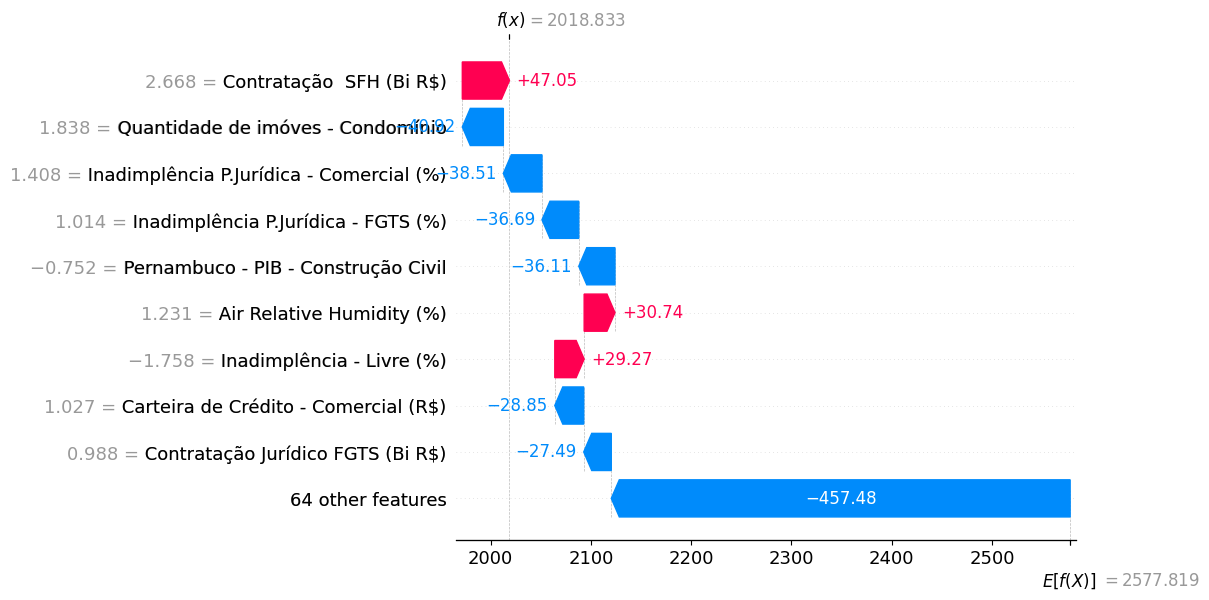

None

In [27]:
explainer = shap.KernelExplainer(f, pd.DataFrame(np.zeros((1, len(train_input.columns.tolist()))), columns=test_input.columns))
shap_values = explainer.shap_values(test_input)
exp = shap.Explanation(shap_values[0], explainer.expected_value, test_input, feature_names=test_input.columns)

display(shap_values[0])
display(shap.force_plot(explainer.expected_value, shap_values[0], test_input))
display(shap.waterfall_plot(exp[0]))

In [28]:
def model_time_series_mae_tester(data, window, seed):
    if window > 2:
        
        # Copia e organiza data geral
        predictions = []
        targets = []
        shap_calc = []
        data_copy = data.copy()
        data_copy[subject] = data[subject].shift(-1)
        data_copy = data_copy.iloc[:-1,1:]
        
        input_df = data_copy.iloc[:, :-1]
        target_df = data_copy.iloc[:, -1:]

        for i in range(window, len(data_copy) + 1):
            
            train_input = input_df.iloc[:i - 1]
            train_input = (train_input - np.mean(train_input, axis=0)) / np.std(train_input, axis=0)
            
            train_target = target_df.iloc[:i - 1]


            test_input = input_df.iloc[:i]
            test_input = ((test_input - np.mean(test_input, axis=0)) / np.std(test_input, axis=0)).iloc[-1:]
            
            test_target = target_df.iloc[i - 1:i]

            model, hitory = neural_network_model(train_input, train_target, want_verbose=0, seed=seed)
            model.save('model_sp.keras')
            
            prediction = model.predict(test_input)
            shap_calc_values, exp = shap_explainer(train_input, test_input, test_target)
            
            predictions.append(prediction[0].item())
            targets.append(test_target.iloc[0, 0])
            
            
            shap_calc.append(shap_team_reward(exp, shap_calc_values, test_target, prediction))
            
            print(f"{test_target.values}(test_target) - {prediction}(prediction) = {(test_target.values - prediction[0])[0]}")
            display("-------------------------------------------------------------------")

        return predictions, targets, np.sum(shap_calc, axis=0)

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 519us/step


array([[ 21.60569713,   7.79903955,  15.98451955,  20.83630573,
          9.54884479,   0.        ,   7.62502082,   5.47214177,
         22.17190323,   0.        ,  13.47599166,   0.        ,
          6.50230541,  13.57509991,   0.        ,   6.61266337,
         15.87407166,   0.        ,   2.78512795,   0.        ,
          8.8911907 ,  14.9985951 ,   2.12131367,   8.8634745 ,
          4.36855386,   1.10390005,   0.        ,   0.        ,
          0.        ,   7.58256527,   1.10893921,   7.93552969,
         10.48846584,  11.52322613,   0.        ,   0.        ,
          5.09087925,   4.01201   ,   0.        ,   1.83653587,
          0.        ,   0.        ,   8.61072251,   0.        ,
         14.36419922,   0.        ,  18.99798012,   0.93716059,
          0.        ,  14.54529518,   7.39443923,   0.        ,
          0.19967656,   7.44009469,   0.        ,   7.52383039,
          7.43826921,   0.        ,  17.12983553,   4.69082959,
        -14.8323607 ,   0.20610029, -16.

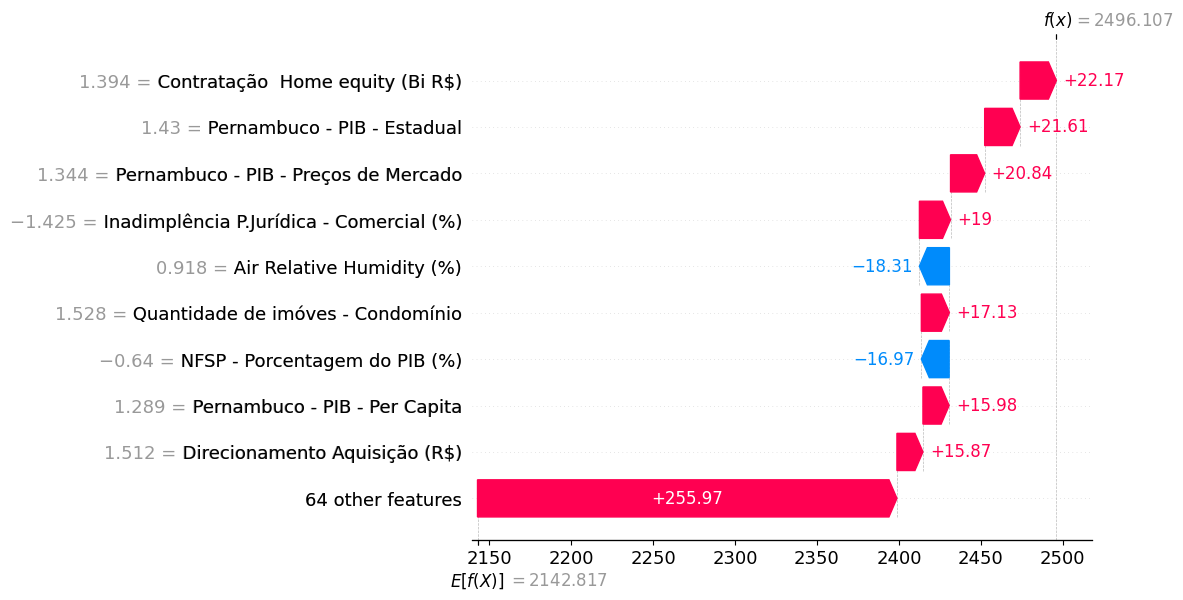

None

[[2728.23]](test_target) - [[2496.1067]](prediction) = [232.12331055]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 551us/step


array([[ 33.68068673,   9.28483752,  17.98406899,  27.1643375 ,
         14.43220094,   2.58150643,   8.45568684,   0.65085832,
         27.83883081,   0.        ,  21.32116842,   0.        ,
          2.18674964,  14.47924282,   0.        ,   3.4371936 ,
         18.00526543,   0.8831649 ,   3.9973481 ,   0.        ,
          8.49644962,  16.30780122,   0.        ,  16.67501339,
         11.75726538,   8.69412043,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  18.14897286,
         16.62789376,  14.03179617,   0.        ,   0.        ,
         11.3292621 ,   7.78601135,   0.        ,   0.        ,
          0.        ,   6.88697945,  10.0583296 ,   0.        ,
         15.62136534,   6.0491269 ,  26.51416191,   7.17381721,
          0.        ,  25.26284847,  14.82814726, -15.40031172,
         -0.16773899,  14.22008908,   0.        ,  10.42454701,
          9.57630586,   0.        ,  28.49241698,  11.07418198,
          0.        ,   0.        , -17.

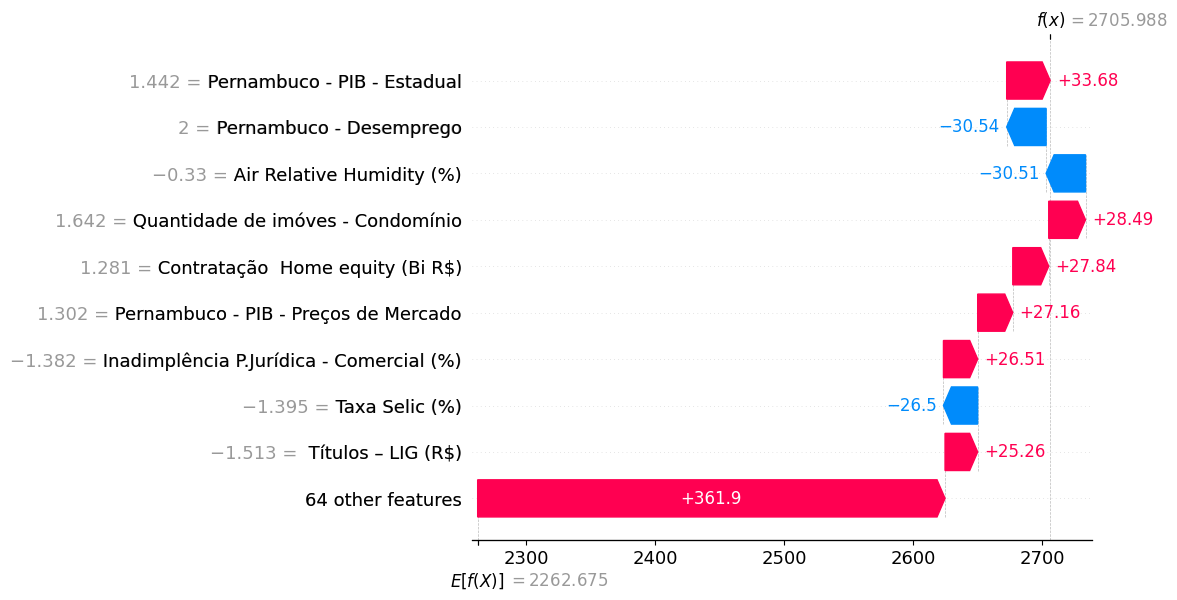

None

[[2982.021]](test_target) - [[2705.9878]](prediction) = [276.03320703]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 491us/step


array([[ 26.49014155,   0.        ,  14.92697248,  13.13217795,
         11.15997579,   8.67507813,   9.98389931, -20.91595433,
          4.67134849,   6.05738123,   9.68905747,  10.56670394,
         -5.79350531, -31.50846292,   0.        , -17.03640302,
          8.18722421,  11.11894662,   6.42289773,  17.39617337,
        -49.40512066, -65.15136875, -22.91844001,   9.99275369,
         15.99860145,   9.24897939,  -3.28825049,  15.03226061,
         17.2643411 , -24.5447362 ,  14.41898362,   7.27582355,
          6.32268907,  16.31097371,   5.21101206,  -8.25555642,
          1.885417  ,   6.73692643,   6.80285631, -40.83232121,
          4.43536339,  24.88262291, -20.1224991 ,   5.96941605,
        -39.02090488,  11.91739272,   3.55365733,  13.27290184,
          1.24172531,  11.15313288,  16.25560794,  -8.12098865,
         11.5145822 ,  12.61987795,  10.9436007 ,  23.33364305,
         12.55135754,  15.00549585,  10.49079853,   8.74090156,
         14.11763059, -31.19135402, -12.

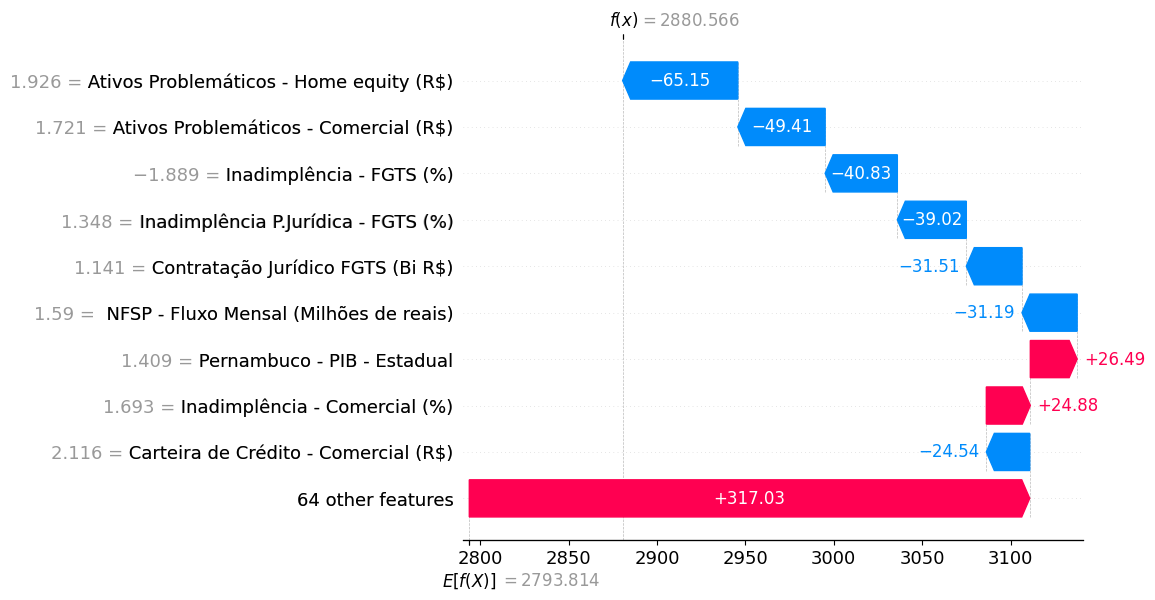

None

[[2983.63285714]](test_target) - [[2880.5662]](prediction) = [103.06669503]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 487us/step


array([[ -1.8915749 ,   0.        , -17.58258398, -29.36425372,
          0.        ,   0.        ,   0.        , -23.15385462,
        -26.43283078,   0.        ,   0.        ,   0.        ,
        -30.53960617, -42.01158256, -34.6093201 , -42.56553988,
         -5.77686031,   0.        , -17.85778378,   0.        ,
        -46.94172863, -30.93232491,   0.        ,   0.        ,
          0.        ,   0.        , -40.18215586,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        , -24.522592  ,
          0.        ,   0.        ,   0.        ,  -1.39718126,
          0.        ,   0.        , -51.90300215,   0.        ,
        -66.59833289,   0.        , -34.3527223 ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , -11.22300276,   0.        ,
          0.        ,   0.        ,  -0.

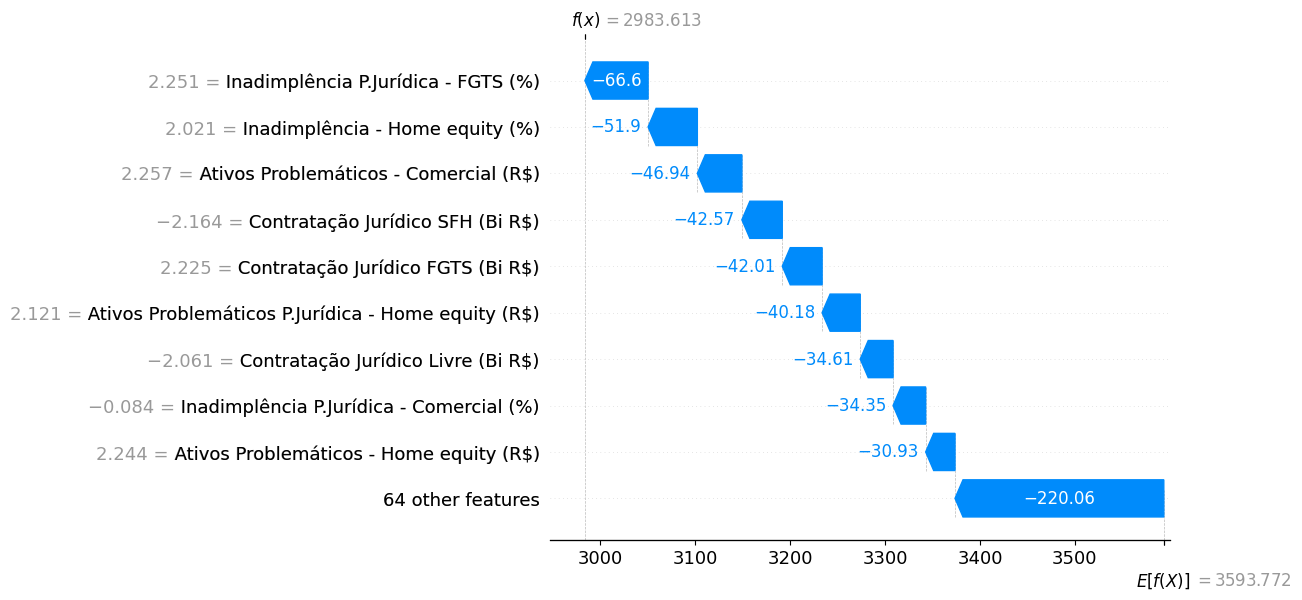

None

[[2632.83788571]](test_target) - [[2983.6128]](prediction) = [-350.77490725]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 517us/step


array([[  6.37733821,  -9.91035539,  -6.65307979,  17.42065434,
         11.01763317,  12.96122975,  19.45266494, -14.34570789,
        -34.68088433, -31.4496171 ,   7.58504311, -36.77381512,
        -15.83556102,  -8.85982825, -15.81766068, -21.82886153,
          2.53682144,  10.26478633, -37.59575329,  20.31483073,
         -7.59321968,  -9.0826968 ,  -6.08594582,  20.56096556,
         25.60673787,   0.        , -21.6005056 , -37.65479971,
        -33.62926571,  -2.18498755,  13.27095727,  21.52025989,
         15.71514926,  17.7722161 ,  28.73964988, -18.64706939,
         18.45064734,  15.49955427, -28.02670982,  -4.8471261 ,
        -38.53241775,  33.12996159, -23.47381845, -32.86489468,
        -15.97486013, -34.68759513, -49.37571838,  18.0825763 ,
        -39.53656951,  14.82724962,   5.31557079,   5.62626049,
         13.68649284,  10.5031735 ,  21.00647858,  10.36352628,
         14.64578389,  20.84477079,  14.16582948,  25.30518648,
          9.02843298,  -2.86242302,   9.

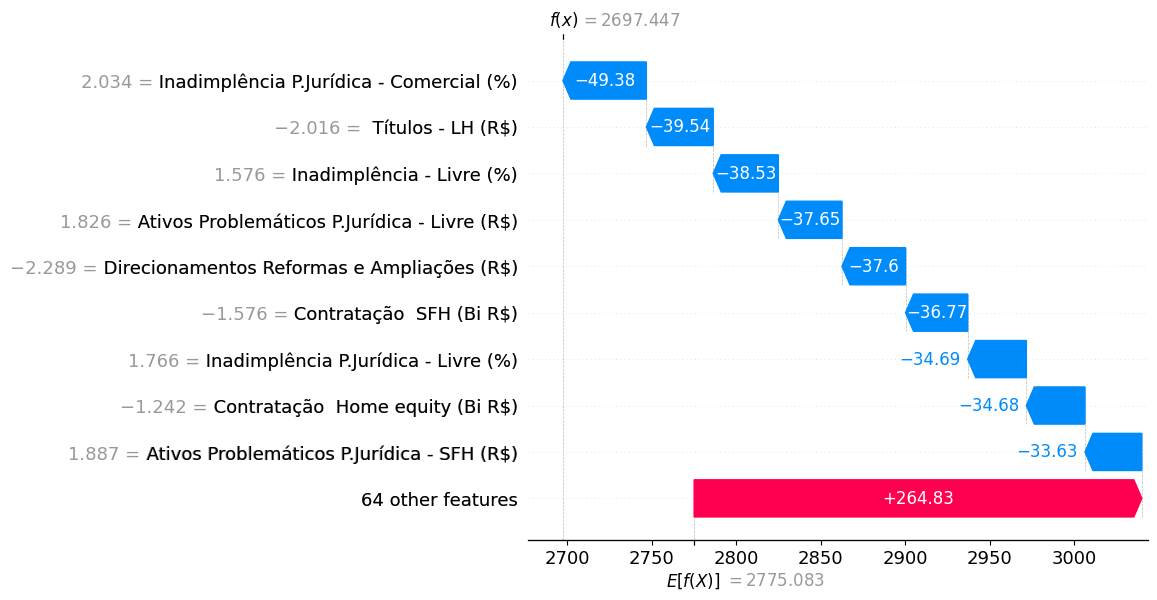

None

[[2308.45525714]](test_target) - [[2697.4468]](prediction) = [-388.9915202]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 542us/step


array([[ -13.20331511,  -24.31270712,  -23.97044681,  -11.1268391 ,
           0.        ,    0.        ,    0.        ,   34.69594853,
         -69.90845827,  -27.93084822,  -19.73716771,   -3.57000653,
         -25.07728599,  -34.26744616,    0.        ,  -28.50778129,
         -19.2559765 ,    0.        ,  -39.51818556,   30.01800271,
         -26.14286982,  -31.47028911,  -10.63511573,    0.        ,
           0.        ,  -11.96532926,  -19.04275598,  -32.11234645,
         -47.52899047,  -19.18832439,    0.        ,    0.        ,
          -9.51156484,    0.        ,   72.14527792,  -13.98944263,
         -21.30462108,    0.        ,    0.        ,  -13.64295414,
          -9.41763042,    0.        ,  -40.93134288,  -31.21943794,
         -51.69692862,  -55.52897163, -105.62293659,    0.        ,
         -25.52505575,  -12.43982611,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,  -16.07378

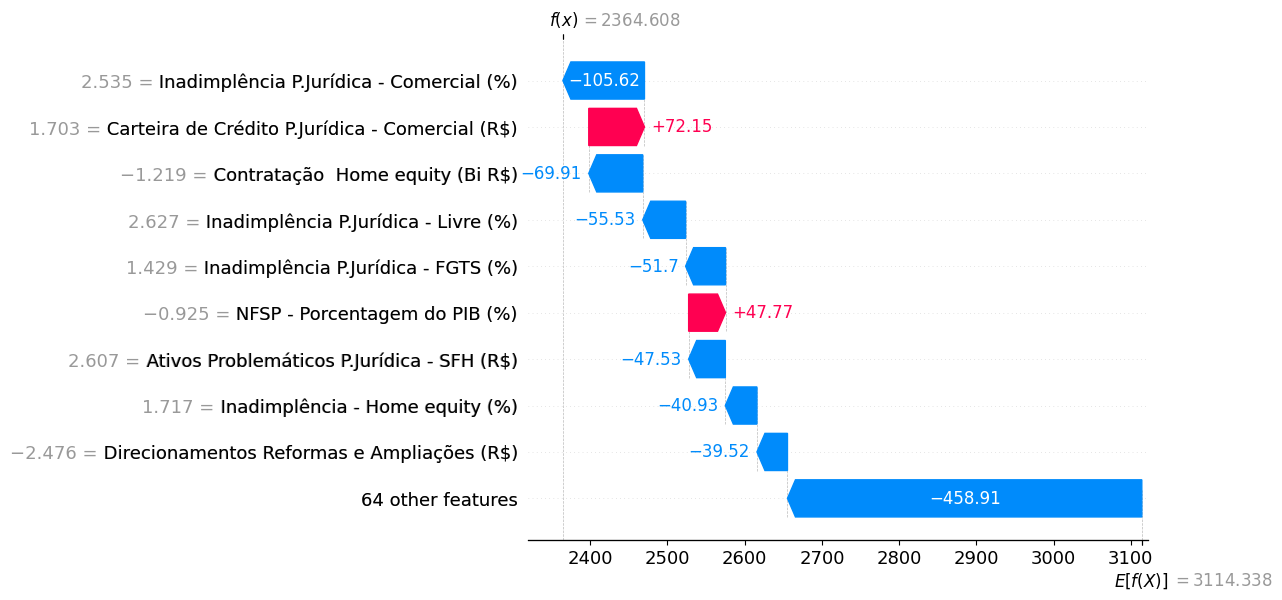

None

[[1813.941]](test_target) - [[2364.6082]](prediction) = [-550.6671543]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 42ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 515us/step


array([[-38.66560067, -19.95119288, -28.30146721, -15.0583236 ,
         -9.79215663,   0.        ,  -4.98808512, -23.35336894,
        -75.09875118, -18.01958817, -14.53147362,   0.        ,
        -13.4809196 , -48.14580674, -11.81154535, -19.46817135,
        -24.00675775,   0.        , -48.18435991,  30.09424811,
        -39.84643357, -26.39093742, -17.3497809 , -13.89863859,
          0.        , -39.04396131, -31.19989595, -34.33274666,
        -21.42105627, -34.54992517,  18.28304724,   0.        ,
        -30.59576334,   0.        ,  46.16357731, -15.95487687,
        -60.23749337, -14.51144454,  42.11762439, -24.49059957,
          0.        ,   0.        , -13.53715814, -28.55544328,
        -44.69216302, -50.66119934, -90.02922475,  19.53934329,
        -15.23878455, -16.21769796,  -6.80458991,   0.        ,
          0.        , -11.71990926,  20.20525554,  -5.90998626,
          0.        ,   0.        , -31.29264316,   0.        ,
        -21.69915232,   0.        ,  26.

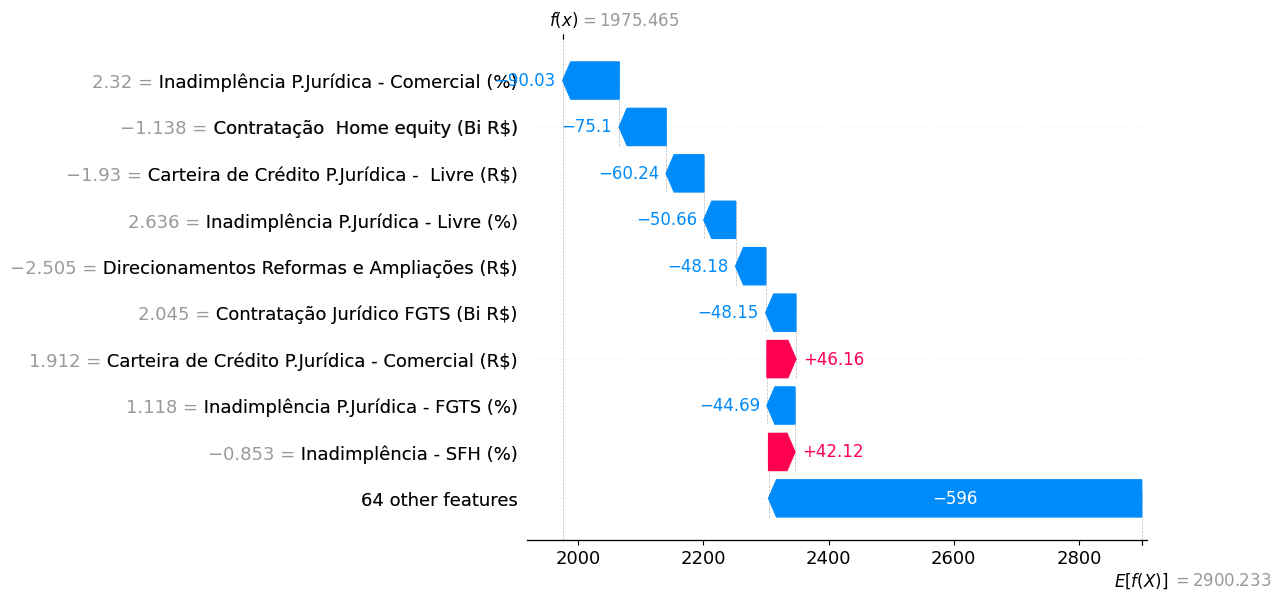

None

[[1645.004]](test_target) - [[1975.4655]](prediction) = [-330.4614541]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 537us/step


array([[ -58.40158899,  -37.02171099,  -87.19502827,  -29.27023537,
         -41.34430626,   -5.29636045,  -22.71241187,    0.        ,
         -47.52579319,  -12.00398482,  -27.49730451,   54.57775871,
         -11.87935012,  -83.48738227,    0.        ,  -16.02820027,
         -35.19095604,    0.        ,  -48.48345547,   16.74163165,
         -56.65020018,  -53.85811774,  -17.81889745,  -19.04583852,
          -6.08591553,  -54.45640632,  -48.55904696,   -8.04189455,
         -15.82348048,  -41.65476645,   15.74484896,    0.        ,
         -40.82230268,  -16.83341109,   38.81305094,  -37.57971594,
         -71.99585062,  -53.45274552,   78.60579575,  -20.32232582,
          46.19420608,    0.        ,  -15.85550149,  -30.05099679,
        -121.43670966,  -40.36660042, -125.48362031,   32.50164949,
          -9.93815744,  -78.89852936,    0.        ,   27.35519214,
           0.        ,  -24.93412187,   21.10496442,  -31.02885323,
         -23.18599522,    0.        ,  -63.00612

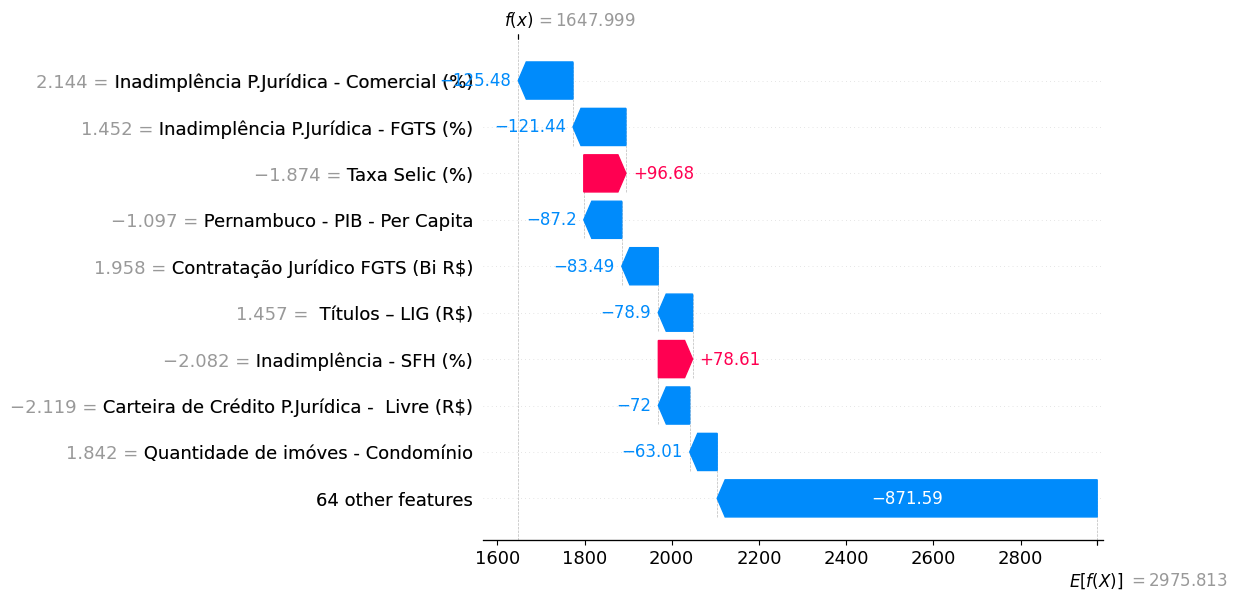

None

[[1690.846]](test_target) - [[1647.9985]](prediction) = [42.84746484]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 527us/step


array([[-12.19397717, -17.58476967,   0.        ,   0.        ,
        -10.07160318,  -6.31095238, -17.43828672,   0.        ,
         11.07096065,  -3.46152569, -15.94461229,  43.24519486,
         -6.87448137, -11.99903411,  -3.52321346,  -3.88983208,
        -18.69657331, -18.20856983,  -7.65651199,   0.        ,
        -14.18602964,  -7.29024656, -12.2400403 , -15.75510275,
        -16.63600776,   0.        , -12.35015237,   0.        ,
         -5.58141278, -15.82197212,   0.        ,   0.        ,
        -17.8341462 ,  -7.70290301,   0.        ,  -7.49799241,
          8.34749891,  12.01521942,  11.72895837,  -9.31783839,
         22.24743597,   0.        ,   0.        ,  -3.9664012 ,
        -16.55184515,   0.        , -16.58445848,  -2.27550297,
          0.        ,  22.24449548, -11.06407321,   0.        ,
         -7.26366975, -16.38276239,  -7.5955543 , -16.00002522,
        -17.38700571,  -8.89194958, -19.54527654, -13.3458144 ,
         21.0856613 , -10.91181368,  39.

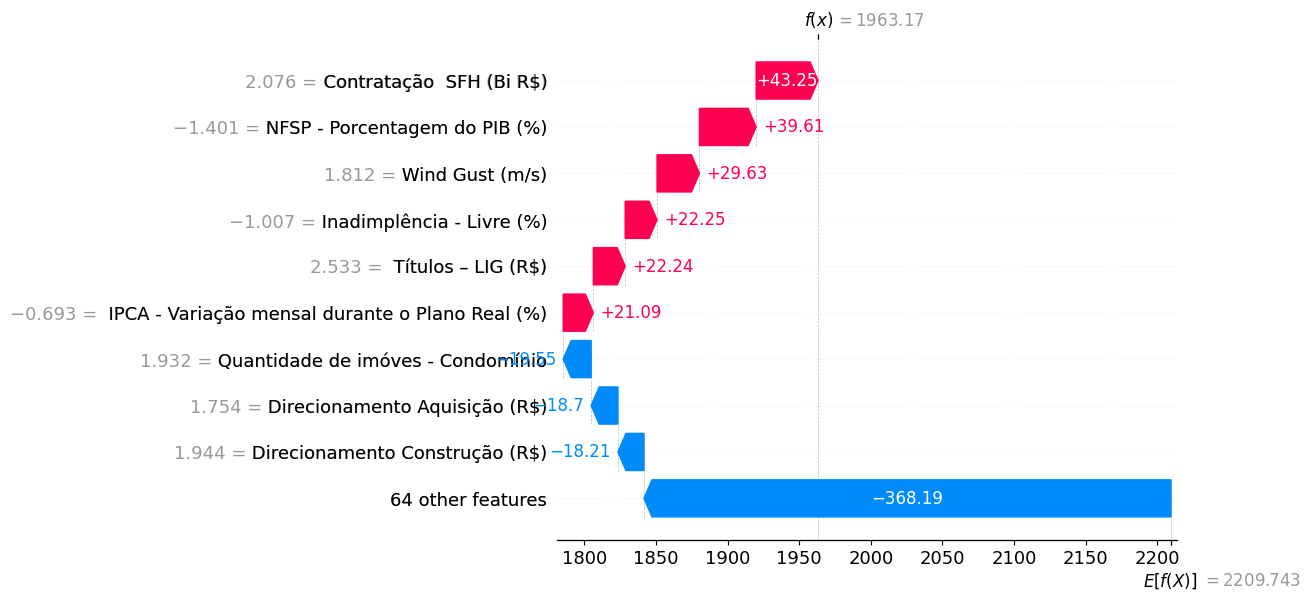

None

[[2018.834]](test_target) - [[1963.1704]](prediction) = [55.66358984]


'-------------------------------------------------------------------'

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 542us/step


array([[-26.53499509, -36.11015539, -27.48989533, -18.98732974,
        -15.4087966 ,  -4.85131921, -19.21024535,   0.        ,
        -20.2014071 ,  13.16559596, -23.69261009,  47.04537361,
         -5.91244665, -27.49137876,  21.31704768,   0.        ,
        -25.63966914, -17.34411094, -18.12662923,   0.        ,
        -22.69561823, -15.8950399 ,  -8.69844551, -23.11676815,
        -18.33870879,   0.        ,   0.        ,  17.10640386,
          0.        , -28.84893131,   0.        , -14.74364611,
        -27.27849598, -24.84445781,  15.5278836 ,   0.        ,
         -6.02068622,   0.        ,   0.        ,   0.        ,
         29.27082122,   0.        ,   0.        ,   0.        ,
        -36.68553934,  -6.67399208, -38.51114905, -14.07425133,
          0.        , -21.83998705, -18.98187853,  17.52928546,
         -3.64327529, -23.82188282,  -1.39290304, -17.57508758,
        -20.05587129,  -7.56305447, -40.9223073 , -13.67165006,
         15.98332206, -15.53456522,  20.

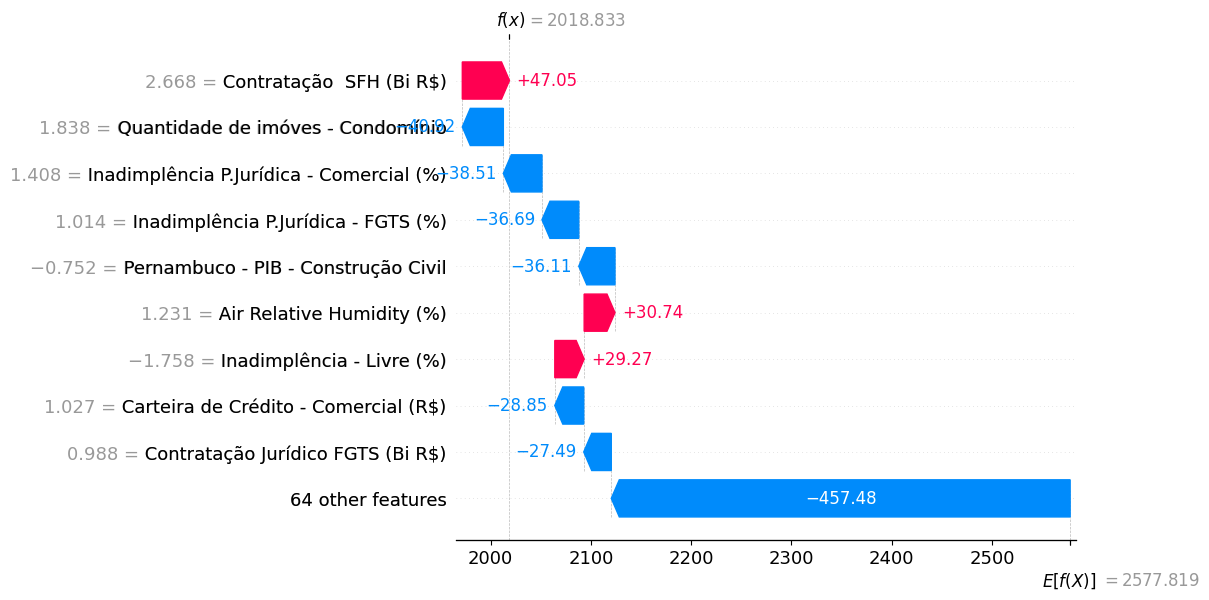

None

[[2022.411]](test_target) - [[2018.833]](prediction) = [3.57799219]


'-------------------------------------------------------------------'

[2496.106689453125,
 2705.98779296875,
 2880.566162109375,
 2983.61279296875,
 2697.44677734375,
 2364.608154296875,
 1975.4654541015625,
 1647.99853515625,
 1963.17041015625,
 2018.8330078125]

In [29]:
predictions, targets, shap_calc = model_time_series_mae_tester(data.iloc[:-1,:], 4, winner_seed)
predictions

In [30]:
shap_calc

array([226.29023914, 154.95927037, 240.0880624 , 147.51914838,
        82.71140977,  -5.24161723,  52.93212986,  53.19593734,
       339.60116802, 115.2361734 , 131.28884453, 192.3172559 ,
       124.08221128, 315.82526451,  86.22857454, 159.37464638,
       168.09653291,  17.29440186, 230.62805301, -43.14164433,
       280.84886074, 271.37741751,  96.37314537,  68.75778279,
        22.9402446 , 109.71736821, 186.38589357, 147.42808404,
       144.39617902, 172.88137445, -12.78940981,   1.94564201,
       136.7506743 ,  48.83648151, -84.3489263 , 136.61037601,
       160.74556308,  64.98596176,  75.18098498, 122.2075465 ,
       146.63627795, -21.35596333, 184.49237432, 135.77422215,
       422.64284824, 203.51184627, 509.02562921,  14.58452262,
        94.62792476, 180.75906472,  51.98432406,  11.98328995,
       -15.87109833,  82.60672333,  -8.04042255,  83.40360524,
        50.91095062,  -3.85921085, 224.0103616 ,   1.58012079,
        56.94762071,  80.23702181,   8.83955781,  39.79

In [35]:
shap_vector = pd.DataFrame([shap_calc], columns=test_input.columns)
shap_vector

,Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - IDH Longevidade,Pernambuco - IDH Educacao,Contratação Comercial (Bi R$),Contratação Home equity (Bi R$),Contratação Livre (Bi R$),...,Taxa Selic (%),Pernambuco - Desemprego,Pernambuco - IDH Renda,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,226.290239,154.95927,240.088062,147.519148,82.71141,-5.241617,52.93213,53.195937,339.601168,115.236173,...,39.796325,-56.850392,14.491626,49.325196,50.752532,151.849361,144.2325,53.305873,-27.523418,42.428334


In [36]:
asc_shap_vector = shap_vector.iloc[0].sort_values()
asc_shap_vector = pd.DataFrame([asc_shap_vector.values], columns=asc_shap_vector.index)
asc_shap_vector

,Carteira de Crédito P.Jurídica - Comercial (R$),Pernambuco - Desemprego,Direcionamento Aplicação (R$),Air Relative Humidity (%),Inadimplência - Comercial (%),Imóvel Área - Privativa (m²),Carteira de Crédito – Home equity (R$),Número de Apartamentos,Pernambuco - IDH Longevidade,Valor Imóveis - Compra (R$),...,Quantidade de imóves - Condomínio,Pernambuco - PIB - Estadual,Direcionamentos Reformas e Ampliações (R$),Pernambuco - PIB - Per Capita,Ativos Problemáticos - Home equity (R$),Ativos Problemáticos - Comercial (R$),Contratação Jurídico FGTS (Bi R$),Contratação Home equity (Bi R$),Inadimplência P.Jurídica - FGTS (%),Inadimplência P.Jurídica - Comercial (%)
0,-84.348926,-56.850392,-43.141644,-27.523418,-21.355963,-15.871098,-12.78941,-8.040423,-5.241617,-3.859211,...,224.010362,226.290239,230.628053,240.088062,271.377418,280.848861,315.825265,339.601168,422.642848,509.025629


In [37]:
mae = mean_absolute_error(predictions, targets)
mae

233.42072953404022

In [38]:
porcentage = mae/np.mean(targets)
porcentage

0.10225994541190002